In [1]:
# Imports of necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import preprocessing
import topic_modeling

IMDB uniques genres : 
['Documentary',
 'Short',
 'Animation',
 'Comedy',
 'Romance',
 'Sport',
 'News',
 'Drama',
 'Fantasy',
 'Horror',
 'Biography',
 'Music',
 'War',
 'Crime',
 'Western',
 'Family',
 'Adventure',
 'Action',
 'History',
 'Mystery',
 '\\N',
 'Sci-Fi',
 'Musical',
 'Thriller',
 'Film-Noir',
 'Talk-Show',
 'Game-Show',
 'Reality-TV',
 'Adult']

# 0) Get Dataset and subset

In [3]:
folder_path = os.path.abspath('MovieSummaries')
df_movies, df_summaries = preprocessing.get_datasets(folderpath=folder_path)

In [4]:
df_movies, df_summaries = preprocessing.get_datasets()
df_genres = preprocessing.get_movie_genres_dataframe(df_movies=df_movies)

if os.path.exists('df_fictional_summaries.csv'):
    df_fictional_summaries = pd.read_csv('df_fictional_summaries.csv')
else:
    df_fictional_summaries = preprocessing.get_fictional_summaries_subset(df_genres=df_genres, df_movies=df_movies, df_summaries=df_summaries)
    df_fictional_summaries.to_csv('df_fictional_summaries.csv')

   Wikipedia_movie_ID Freebase_genre_ID      movie_genre
0              975900         /m/01jfsb         Thriller
1              975900          /m/06n90  Science Fiction
2              975900          /m/03npn           Horror
3              975900         /m/03k9fj        Adventure
4              975900          /m/0fdjb     Supernatural


# 0) Preprocess summaries

In [5]:
# import further necessary packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [6]:
# FINAL EASY APPROACH
if os.path.exists("preprocessed_fictional_summaries.csv"):
    df_preprocessed_fictional_summaries = pd.read_csv("preprocessed_fictional_summaries.csv")
else:
    df_preprocessed_fictional_summaries = df_fictional_summaries.copy()
    df_preprocessed_fictional_summaries['preprocessed_summary'] = preprocessing.preprocess_docs(df_preprocessed_fictional_summaries['movie_summary'])

In [7]:
df_preprocessed_fictional_summaries

,Unnamed: 0,index,movie_ID,movie_summary,preprocessed_summary
0,0,1,31186339,The nation of Panem consists of a wealthy Capi...,The nation of consists of a wealthy and twelve...
1,1,49,1838882,"The evil Lord Conqueror, head of Conqueror's C...","The evil , head of 's , is given a prophecy by..."
2,2,54,4466226,During the Great depression in 1933 in Winnipe...,"During the Great depression in 1933 in , , an ..."
3,3,76,657446,"In Los Angeles, California Fletcher Reede is ...","In , is a career - focused lawyer and divorc..."
4,4,80,32163620,"In the winter of 1945, immediately after the l...","In the winter of 1945 , immediately after the ..."
...,...,...,...,...,...
3936,3936,42259,1883373,The following is a detailed overview of the mi...,The following is a detailed overview of the mi...
3937,3937,42264,24434156,"In the not too distant future, society has lev...","In the not too distant future , society has le..."
3938,3938,42276,20402406,"In the 13th century, three women accused of wi...","In the 13th century , three women accused of w..."
3939,3939,42292,26261438,While drinking alone one night and reminiscing...,While drinking alone one night and reminiscing...


In [15]:
df_movies['release_year'] = pd.to_datetime(df_movies['movie_release_date'], format='mixed', errors='coerce').dt.year

In [25]:
res = pd.merge(df_preprocessed_fictional_summaries, df_movies[['Wikipedia_movie_ID', 'release_year']], how='left', left_on='movie_ID', right_on='Wikipedia_movie_ID')

In [29]:
vectorizer2 = CountVectorizer(min_df=2)
dtm = vectorizer2.fit_transform(df_preprocessed_fictional_summaries['preprocessed_summary'])
dtm.shape

(3941, 32270)

In [37]:
vectorizer5 = CountVectorizer(min_df=5)
dtm5 = vectorizer5.fit_transform(df_preprocessed_fictional_summaries['preprocessed_summary'])
res['wordcount_min5freq'] = np.sum(dtm5, axis = 1)

In [33]:
res['wordcount_min2freq'] = np.sum(dtm, axis = 1)

<Axes: xlabel='release_year', ylabel='wordcount_min2freq'>

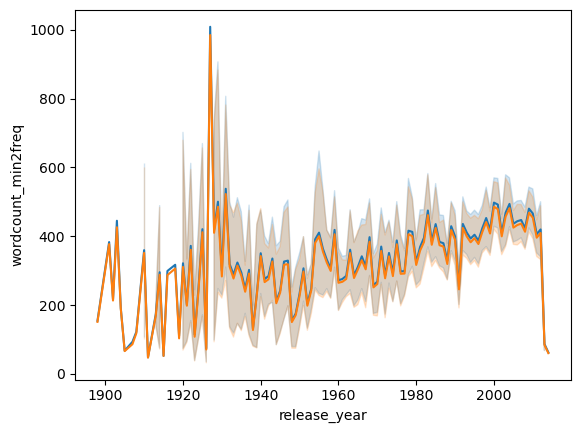

In [38]:
sns.lineplot(data=res, x = 'release_year', y = 'wordcount_min2freq')
sns.lineplot(data=res, x = 'release_year', y = 'wordcount_min5freq')

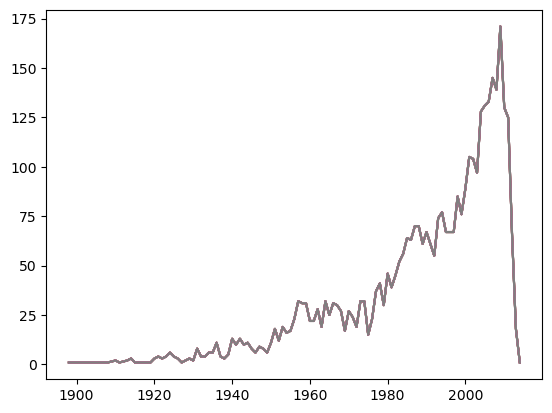

In [39]:
plt.plot(res.groupby('release_year').agg('count'))

## a) With nltk

In [10]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
# Data sample as the previously defined subset of fictional summaries
sample_summaries = df_fictional_summaries.copy()

# Preprocess the documents
preprocessed_summaries = [preprocessing.filter_names(doc) for doc in sample_summaries['movie_summary']]

# Takes up to 3-4 minutes

## b) with spacy

In [12]:
preprocessed_summaries = preprocessing.preprocess_docs(df_fictional_summaries['movie_summary'])

# portable pc time : around 3min

In [11]:
preprocessed_summaries

NameError: name 'preprocessed_summaries' is not defined

In [18]:
preprocessed_summaries_df = df_fictional_summaries.copy().reset_index()
preprocessed_summaries_df['preprocessed_summary'] = preprocessed_summaries
preprocessed_summaries_df

# takes around 1min30

,index,Unnamed: 0,Wikipedia_movie_ID,movie_summary,preprocessed_summary
0,0,1,31186339,The nation of Panem consists of a wealthy Capi...,nation consist wealthy poor district punishmen...
1,1,49,1838882,"The evil Lord Conqueror, head of Conqueror's C...",evil head give prophecy say find young child g...
2,2,54,4466226,During the Great depression in 1933 in Winnipe...,great depression old fortune teller predict fu...
3,3,76,657446,"In Los Angeles, California Fletcher Reede is ...",career focus lawyer divorced father love spend...
4,4,80,32163620,"In the winter of 1945, immediately after the l...",winter immediately liberation member french un...
...,...,...,...,...,...
3936,3936,42259,1883373,The following is a detailed overview of the mi...,following detailed overview mini movie plot co...
3937,3937,42264,24434156,"In the not too distant future, society has lev...",distant future society levy law smoking force ...
3938,3938,42276,20402406,"In the 13th century, three women accused of wi...",century woman accuse witchcraft hang priest cl...
3939,3939,42292,26261438,While drinking alone one night and reminiscing...,drink night reminiscing previous adventure pla...


In [ ]:
df_preprocessed_fictional_summaries

In [ ]:
save_csv = False
read_csv = True

if save_csv:
    preprocessed_summaries.to_csv('preprocessed_fictional_summaries.csv')
elif read_csv:
    preprocessed_sample_summaries = pd.read_csv("preprocessed_fictional_summaries.csv")

# Perform LDA on preprocessed summaries

In [19]:
from sklearn.preprocessing import Normalizer

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,castle,vampire,king,love,marry,daughter,father,return,fall,princess,kingdom,palace,human,turn,magic
Topic 1,tell,leave,child,go,house,see,come,father,day,home,mother,man,take,night,try
Topic 2,kill,body,police,shoot,leave,car,man,murder,try,escape,death,room,discover,die,dead
Topic 3,game,try,turn,play,wish,help,magic,tell,friend,book,get,spell,power,fairy,spider
Topic 4,ship,planet,crew,robot,space,destroy,escape,take,fly,rocket,rescue,use,return,force,land
Topic 5,time,school,help,new,return,work,machine,friend,steal,take,attempt,plan,leave,escape,try
Topic 6,alien,human,destroy,team,base,discover,nuclear,control,order,military,computer,government,attack,mission,scientist
Topic 7,kill,attack,fight,escape,group,leave,take,battle,arrive,man,try,destroy,power,force,return
Topic 8,film,world,woman,man,young,life,year,story,live,old,time,name,love,people,new
Topic 9,creature,monster,island,giant,scientist,eat,snake,head,sea,animal,kill,beast,begin,attack,local


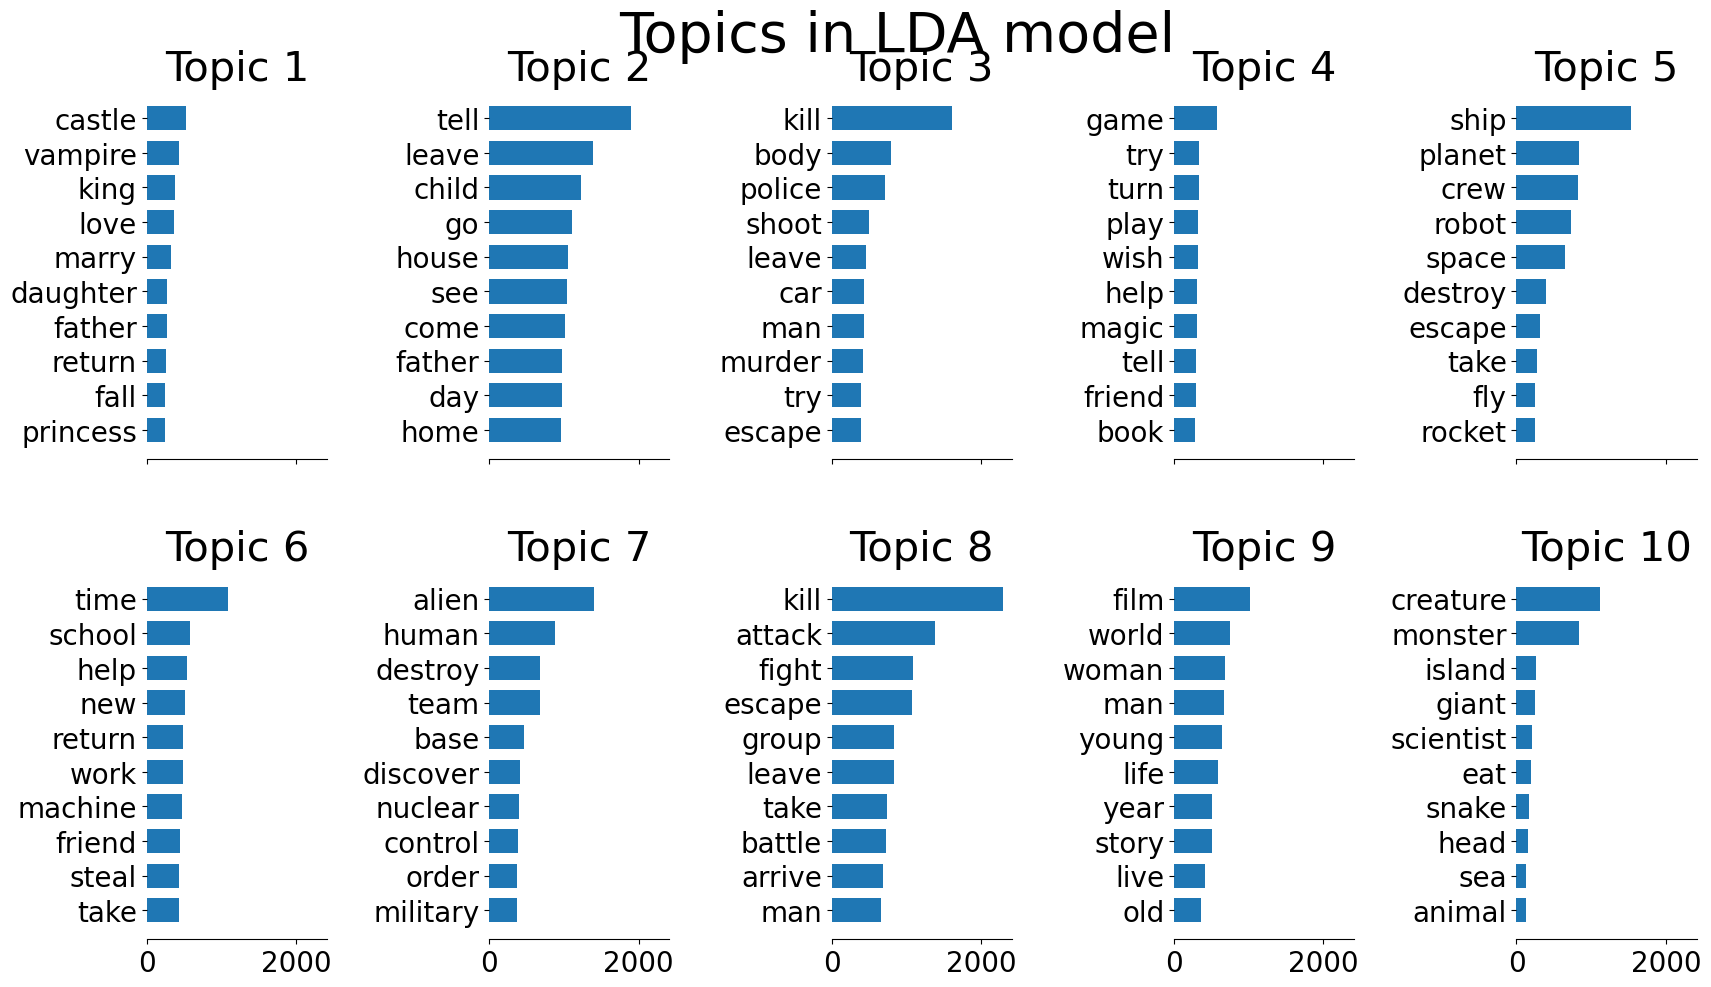

In [115]:
# General parameters to adapt
n_features = 1000
n_topics = 10
n_top_words = 15
alpha = 0.4
# doc_topic_prior:=alpha : represents the parameter of the Dirichlet prior on the per-document topic distributions. It influences how many topics are likely to be present in a document.
    # Higher alpha values result in documents with more topics, while lower values lead to sparser documents with fewer dominant topics.
beta = 0.2
# topic_word_prior := beta : represents the parameter of the Dirichlet prior on the per-topic word distributions. It controls the number of words associated with each topic.
#Similar to alpha, higher beta values result in topics with more words, while lower values lead to sparser topics.


# Vectorize the summaries
vectorizer = CountVectorizer(max_df=0.50, min_df=10, max_features=n_features)
#vectorizer = TfidfVectorizer(stop_words='english', max_df=0.75, min_df=10, max_features=n_features)
dtm = vectorizer.fit_transform(preprocessed_summaries)

# normalize per row
#transformer = Normalizer(norm='max').fit(dtm)
#dtm_normalized = transformer.transform(dtm)

# Create the LatentDirichletAllocation model
lda = LatentDirichletAllocation(
    n_components=n_topics,
    doc_topic_prior= alpha, 
    topic_word_prior= beta,
    learning_method = 'online',
    learning_offset= 50,
    learning_decay=0.8,
    max_iter=10,
    random_state=7,
    verbose=1
)


lda.fit(dtm)
#lda.fit(dtm_normalized)

# Define function to show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda, n_words=10):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

# Show the topics with their n_top words in a DataFrame form
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda, n_words=n_top_words)
df_topic_keywords = pd.DataFrame(topic_keywords)

# Improve comprehension with adapted column and index names
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
display(df_topic_keywords)

# Plot the top n words for all topics
tf_feature_names = vectorizer.get_feature_names_out()
topic_modeling.plot_top_words(lda, tf_feature_names, 10, n_topics=n_topics, title="Topics in LDA model")

# takes around 1min30 with 2000 features

### Other: Topic coherence score

In [55]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

dictionary = Dictionary(topic_keywords)
bow_corpus = [dictionary.doc2bow(topic_words) for topic_words in topic_keywords]

cm = CoherenceModel(topics=topic_keywords, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
coherence = cm.get_coherence_per_topic()
coherence

[-0.6740974331817552,
 -0.4583656053663939,
 -0.20813774034919819,
 -0.40443264841248805,
 -0.44591725971630664,
 -0.2658032123004911,
 -0.32957374310384846,
 -0.34003671728106055,
 -0.026405606868474107,
 -0.7521925106205929]

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Assume lda is the fitted LatentDirichletAllocation model
# You should have already fit the model on your document-term matrix

# Get the top 15 words for each topic
num_top_words = 15
feature_names = lda.components_.argsort(axis=1)[:, :-num_top_words-1:-1]
feature_names.shape

(10, 15)

In [67]:
# Create vectors representing the word distributions for each topic
topic_vectors = None
for topic_words in feature_names:
    topic_vector = np.zeros(len(lda.components_[0]))
    topic_vector[topic_words] = 1
    if topic_vectors is None:
        topic_vectors = topic_vector
    else:
        topic_vectors = np.vstack((topic_vectors,topic_vector))

# Compute cosine similarity between two topics
topic1_index = 0 
topic2_index = 9
similarity = cosine_similarity([topic_vectors[topic1_index]], [topic_vectors[topic2_index]])

print(f"Cosine Similarity between Topic {topic1_index} and Topic {topic2_index}: {similarity[0][0]}")

(10, 3000)

In [99]:
# TO AVOID SPARSE MATRICES

def get_similarity_between_vectors(topic1_index = 0 , topic2_index = 9, feature_array=feature_names, tf_feature_names = None):

    topic1_word_ids = feature_array[topic1_index, :]
    topic2_word_ids = feature_array[topic2_index, :]
    combined_word_ids = np.hstack((topic1_word_ids, topic2_word_ids))
    if tf_feature_names is not None:
        # Print words associated to each topic (debug purpose)
        topic1_words = tf_feature_names[topic1_word_ids]
        topic2_words = tf_feature_names[topic2_word_ids]
        print(f"words of topic {topic1_index}: {topic1_words} and topic {topic2_index}: {topic2_words}")
    # Create binary vectors
    topic1_vector = np.isin(combined_word_ids, topic1_word_ids).astype(int)
    topic2_vector = np.isin(combined_word_ids, topic2_word_ids).astype(int)

    # Reshape to (1, 2 * num_top_words) for consistent shape
    topic1_vector = topic1_vector.reshape(1, -1)
    topic2_vector = topic2_vector.reshape(1, -1)

    # Compute cosine similarity
    similarity = cosine_similarity(topic1_vector, topic2_vector)
    print(f"Cosine Similarity between Topic {topic1_index} and Topic {topic2_index}: {similarity[0][0]:.3f}")
    return similarity
    
for i in range(10):
    get_similarity_between_vectors(1,i)

Cosine Similarity between Topic 1 and Topic 0: 0.235
Cosine Similarity between Topic 1 and Topic 1: 1.000
Cosine Similarity between Topic 1 and Topic 2: 0.000
Cosine Similarity between Topic 1 and Topic 3: 0.000
Cosine Similarity between Topic 1 and Topic 4: 0.000
Cosine Similarity between Topic 1 and Topic 5: 0.125
Cosine Similarity between Topic 1 and Topic 6: 0.500
Cosine Similarity between Topic 1 and Topic 7: 0.125
Cosine Similarity between Topic 1 and Topic 8: 0.000
Cosine Similarity between Topic 1 and Topic 9: 0.125


## Find topic related to movie

In [ ]:
fictional_summaries = sample_summaries.copy().reset_index()

In [49]:
topic_names = ['familiy', 'crime', 'worlwide_war', 'robot_science', 'time_travel', 'space', 'monster', 'creatures', 'vampires', 'fight_kings']

In [55]:
i = fictional_summaries.sample(1)

print(i['movie_summary'].values)
topic_distrib = lda.transform(dtm[i.index,:])
print(topic_distrib)
print(topic_names[topic_distrib.argmax()])

['Branded as a "nerd" and harassed by the school bully, twelve-year-old Arthur is rescued by a magical troll who knows that the boy unwittingly holds the secret to defeat an evil dragon. Arthur\'s loving mom, struggling to keep her devious ex-husband from gaining custody of Arthur, dismisses her son’s "fantasies" until she realizes the all too real immediate danger and joins forces with Arthur, the troll, and a dashing but washed up video-game master. Together, they hope to conquer the dragon and the wicked vice-principal who threaten civilization.']
[[0.41326681 0.00400058 0.00400092 0.0040011  0.00400054 0.00400166
  0.1229096  0.00400125 0.43581648 0.00400106]] vampires


In [62]:
vectorizer.inverse_transform(dtm[i.index,:])

[array(['boy', 'year', 'old', 'son', 'evil', 'defeat', 'game', 'ex',
        'knows', 'realizes', 'husband', 'secret', 'magical', 'real',
        'forces', 'dragon', 'holds', 'school', 'joins', 'master', 'video',
        'hope', 'rescued'], dtype='<U13')]